# Facebook Prophet prediction
---

### Initialization

In [5]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

from sklearn.metrics import mean_squared_error,mean_absolute_error
from prophet import Prophet

import sys
import os
# Get the parent directory and add it to sys.path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from functions_nico.nico_preprocessing import load_data, merge_oil, merge_ex_rate, get_oil_euro
from functions_nico.nico_models import baseline_model, print_model, split_data,prophet_model


In [6]:
# Load data
df = load_data("../data/fueldata/wertheim_23-25.parquet") # Load fuel data
df = merge_oil(df)                                        # Include oil data
df = merge_ex_rate(df)                                    # Include exchange rates
get_oil_euro(df)                                          # Calculate oil price in euro

# Reduce data
df = df[df["datetime"] >= pd.to_datetime("2025-04-01")]
df = df[df["datetime"] < pd.to_datetime("2025-05-02")]

### Fuel price prediction

In [7]:
#ARAL
real_data, predictions = prophet_model(df,"fb0f8030-c1eb-4df1-9410-054eea7422ad",test_days=1,date="datetime",value="e5",stepsize=5)

16:23:31 - cmdstanpy - INFO - Chain [1] start processing
16:23:32 - cmdstanpy - INFO - Chain [1] done processing


### Visualization and results

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/functions_nico/nico_models.py:193: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


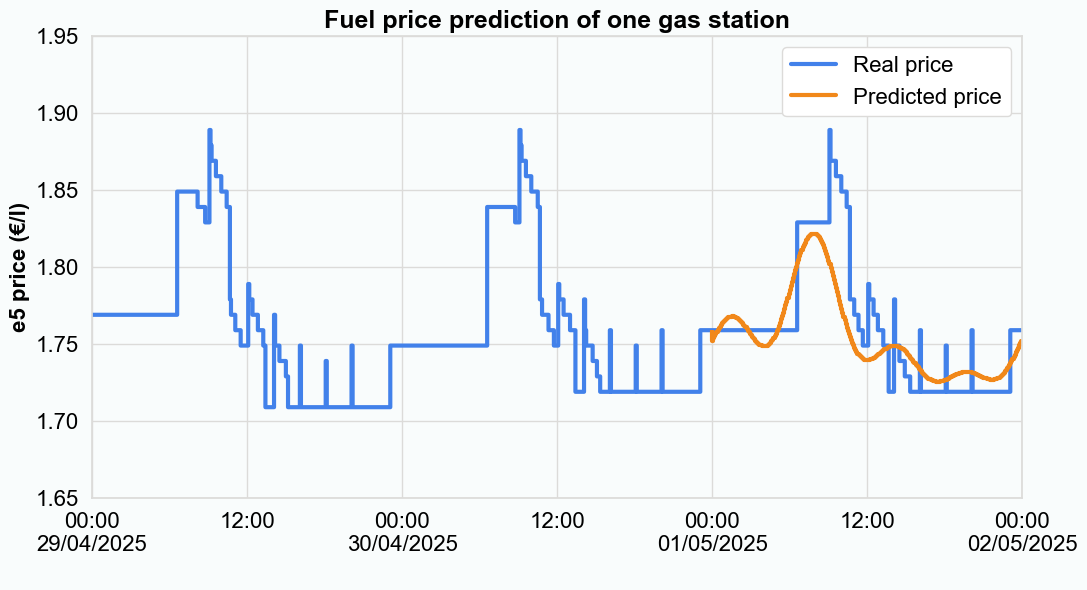

RMSE: 0.025
MAE: 0.017


In [10]:
params = {"background":"#f9fcfc",
          "gridcolor": "#dcdbd9",
          "legendedge": "#dcdbd9",
          "legendface": "white",
          "legendcol": "black",
          "textcolor": "black"
          }

print_model(real_data,predictions,x="datetime",y="e5",xlim=("2025-04-29","2025-05-02"),ylim=(1.65,1.95),title = "Fuel price prediction of one gas station",params=params)